In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from datetime import datetime
import calendar
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
data1=pd.read_csv('data_tp/properati-AR-2013-08-01-properties-sell.csv')
data2=pd.read_csv('data_tp/properati-AR-2014-02-01-properties-sell.csv')
data3=pd.read_csv('data_tp/properati-AR-2014-08-01-properties-sell.csv')
data4=pd.read_csv('data_tp/properati-AR-2015-02-01-properties-sell.csv')
data5=pd.read_csv('data_tp/properati-AR-2015-08-01-properties-sell.csv')
data6=pd.read_csv('data_tp/properati-AR-2016-02-01-properties-sell.csv')
data7=pd.read_csv('data_tp/properati-AR-2016-08-01-properties-sell.csv')
data8=pd.read_csv('data_tp/properati-AR-2017-02-01-properties-sell.csv')
data9=pd.read_csv('data_tp/properati-AR-2017-08-01-properties-sell.csv')


In [2]:
data_frames = [data1, data2,data3,data4,data5,data6,data7,data8,data9]
data = pd.concat(data_frames)

In [3]:
#Cuantos lugares (o provincias) reflejan los avisos
data['state_name'].value_counts()

Capital Federal                 78606
Bs.As. G.B.A. Zona Norte        74991
Bs.As. G.B.A. Zona Oeste        42015
Buenos Aires Costa Atlántica    37457
Bs.As. G.B.A. Zona Sur          28232
Córdoba                         24663
Santa Fe                        21276
Buenos Aires Interior            9546
Mendoza                          1936
Río Negro                        1885
Misiones                         1714
Neuquén                          1683
Entre Ríos                       1626
Tucumán                          1133
San Luis                          762
Salta                             707
Corrientes                        693
La Pampa                          620
Chubut                            446
Catamarca                         334
Chaco                             173
San Juan                          138
Tierra Del Fuego                  134
Jujuy                              80
Santa Cruz                         69
Formosa                            66
La Rioja    

In [4]:
# Filtro por Capital Federal y GBA
data = data.loc[(data.state_name=='Capital Federal') | (data.state_name.str.contains('G.B.A'))]

# Número total de ambientes de los departamentos en venta

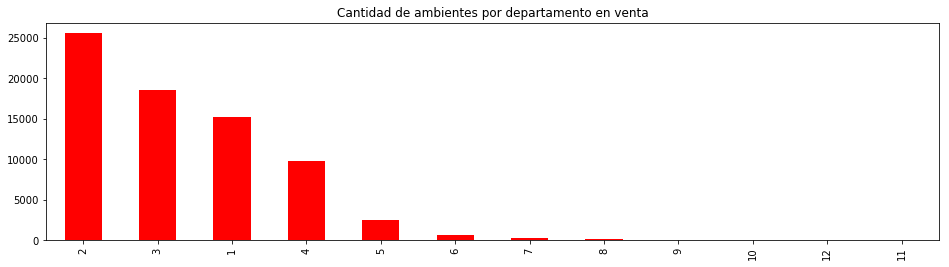

In [17]:
rooms_per_apartment = data.loc[(data.property_type=='apartment') & (data.rooms<13) ,['property_type','rooms']].dropna()
rooms_per_apartment['rooms'].astype(int).value_counts().plot(kind='bar',figsize=(16,4), title="Cantidad de ambientes por departamento en venta",color='red');

# Superficie total promedio a través del tiempo

In [18]:
grouped = data[['property_type','surface_total_in_m2','created_on']].dropna()
grouped.created_on = pd.to_datetime(grouped.created_on, format='%Y/%m/%d')
Prop_TotalSurf =grouped[['property_type','surface_total_in_m2']]
Prop_TotalSurf['Periodo'] = grouped['created_on'].map(lambda x: x.strftime('%Y-%m'))
#En algunos casos la superficie total era demasiada
#decidí tomar el promedio dentro de un rango de valores más o menos "usual"
Prop_TotalSurf = Prop_TotalSurf.loc[((Prop_TotalSurf.surface_total_in_m2<1000) &\
                                     (Prop_TotalSurf.surface_total_in_m2>100) &\
                                    (Prop_TotalSurf.property_type== 'house')) |\
                                    ((Prop_TotalSurf.surface_total_in_m2<500) &\
                                    ((Prop_TotalSurf.property_type== 'apartment')|\
                                     (Prop_TotalSurf.property_type== 'PH')) &\
                                    (Prop_TotalSurf.surface_total_in_m2>18))\
                                   ]


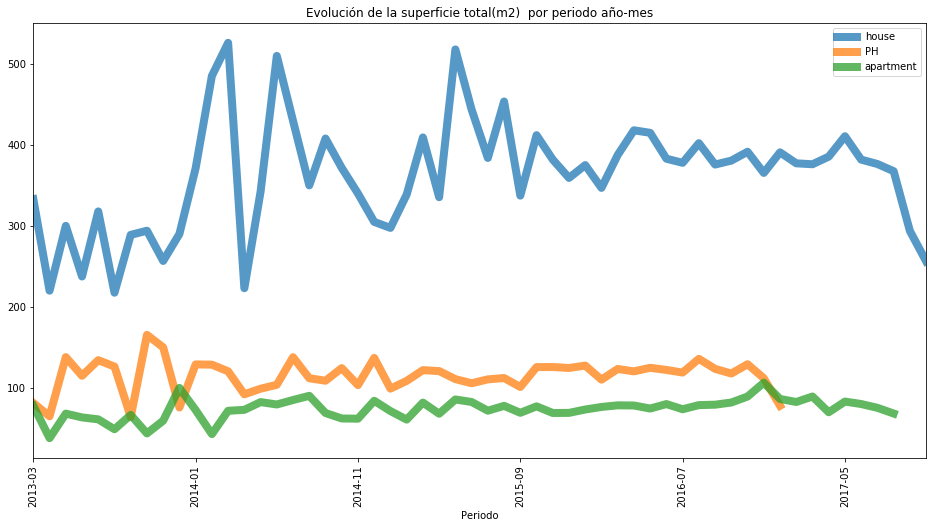

In [19]:

plt.figure()

Prop_TotalSurf.loc[Prop_TotalSurf.property_type.str.contains('house'),['property_type','surface_total_in_m2','Periodo']].groupby('Periodo')\
                .mean().loc[:,'surface_total_in_m2'].plot(rot=90,linewidth=8,figsize=(16,8),alpha=0.75,label='house',title='Evolución de la superficie total(m2) por periodo año-mes');

Prop_TotalSurf.loc[Prop_TotalSurf.property_type.str.contains('PH'),['property_type','surface_total_in_m2','Periodo']].groupby('Periodo')\
                .mean().loc[:,'surface_total_in_m2'].plot(rot=90,linewidth=8,figsize=(16,8),alpha=0.75,label='PH',title='Evolución de la superficie total(m2)  por periodo año-mes')

Prop_TotalSurf.loc[Prop_TotalSurf.property_type.str.contains('apartment'),['property_type','surface_total_in_m2','Periodo']].groupby('Periodo')\
                .mean().loc[:,'surface_total_in_m2'].plot(rot=90,linewidth=8,figsize=(16,8),alpha=0.75,label='apartment',title='Evolución de la superficie total(m2)  por periodo año-mes')
plt.legend();


# Cuántas propiedades nuevas fueron publicadas

In [20]:
new_prop = data.loc[(data.description.str.contains('nuevo') |data.description.str.contains('estrenar'))\
         , ['state_name','created_on','currency','rooms','property_type','surface_total_in_m2']]


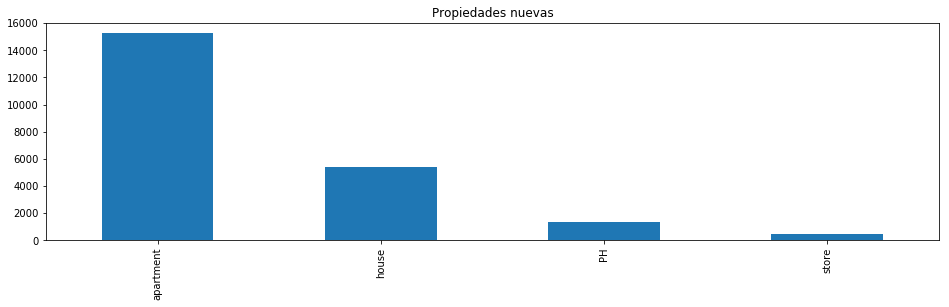

In [21]:
new_prop['property_type'].value_counts()[0:19].plot(kind='bar',figsize=(16,4), title="Propiedades nuevas");

In [22]:
#Qué cantidad de estas propiedades nuevas tiene precio fijado en USD
new_prop.currency.value_counts()

USD    19600
ARS      680
Name: currency, dtype: int64

# Dónde hubo más venta de propiedades nuevas

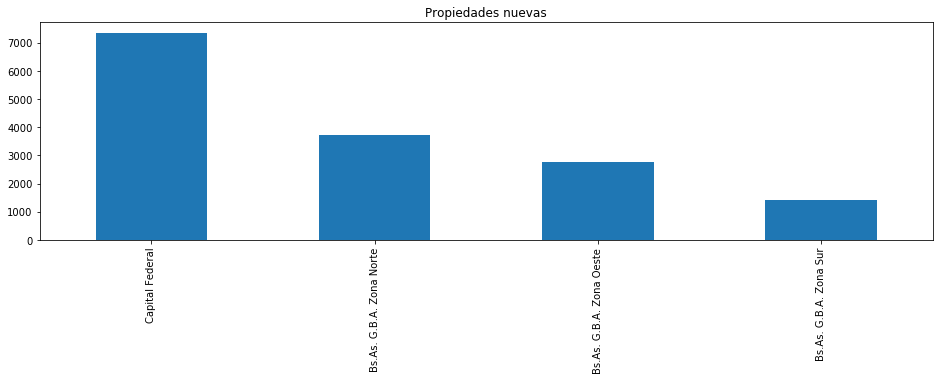

In [23]:
new_prop_state = new_prop.loc[new_prop.property_type == 'apartment']
new_prop_state['state_name'].value_counts()[0:19].plot(kind='bar',figsize=(16,4), title="Propiedades nuevas");

# Cuál fue la cantidad de ambientes de los departamentos nuevos en CABA

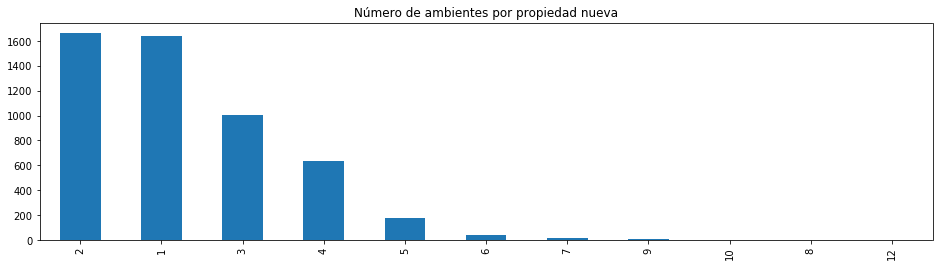

In [24]:
new_prop_CABA_rooms = new_prop.loc[(new_prop.state_name == 'Capital Federal') & \
                                   (new_prop.property_type == 'apartment'),['rooms','property_type']].dropna()
new_prop_CABA_rooms['rooms'].astype(int).value_counts().plot(kind='bar',figsize=(16,4), title="Número de ambientes por propiedad nueva");

# Cuál fue el tamaño en m2 de los departamentos nuevos de 1 ambiente en CABA

In [25]:
new_prop.created_on = pd.to_datetime(new_prop.created_on, format='%Y/%m/%d')
new_prop['Periodo'] = new_prop['created_on'].map(lambda x: x.strftime('%Y-%m'))

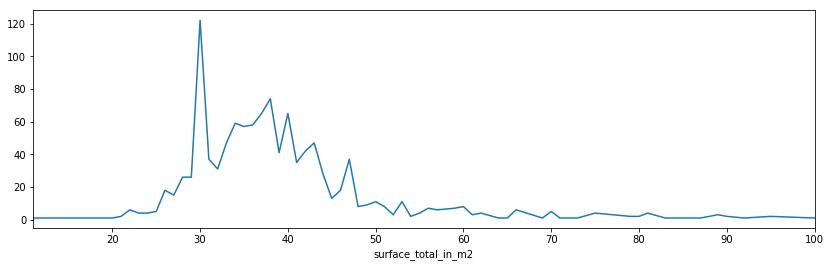

In [26]:
new_1caba =new_prop.loc[(new_prop.rooms==1) & (new_prop.surface_total_in_m2<101) &\
             (new_prop.state_name=='Capital Federal') &\
            (new_prop.surface_total_in_m2>10)]
new_1caba.groupby('surface_total_in_m2').count()['property_type'].plot(figsize=(14,4))

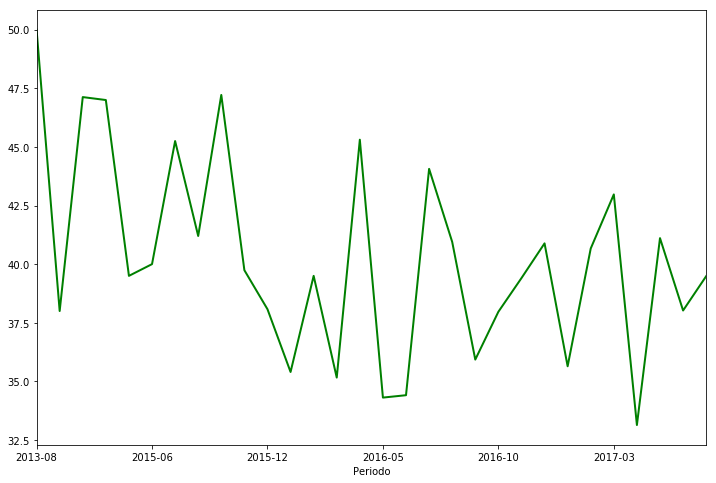

In [27]:
#Promedio de superficie total en m2 a través del tiempo
new_1caba.groupby('Periodo').mean().loc[:,'surface_total_in_m2'].plot(linewidth=2,figsize=(12,8),color='green');

# Evolución de la superficie total promedio en m2 de los departamentos nuevos de 2 ambientes en G.B.A

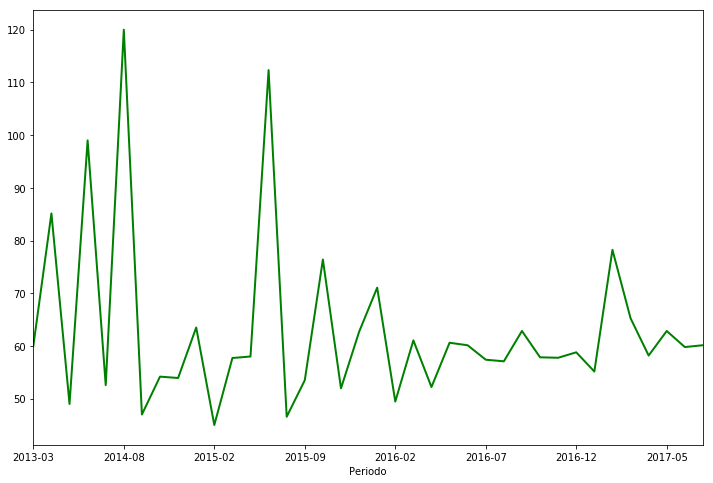

In [28]:
new_2gba =new_prop.loc[(new_prop.rooms==2) & (new_prop.surface_total_in_m2<300) &\
             (new_prop.state_name.str.contains('G.B.A')) &\
            (new_prop.surface_total_in_m2>40)]
new_2gba.groupby('Periodo').mean().loc[:,'surface_total_in_m2'].plot(linewidth=2,figsize=(12,8),color='green');

# Top 20 Lugares más baratos


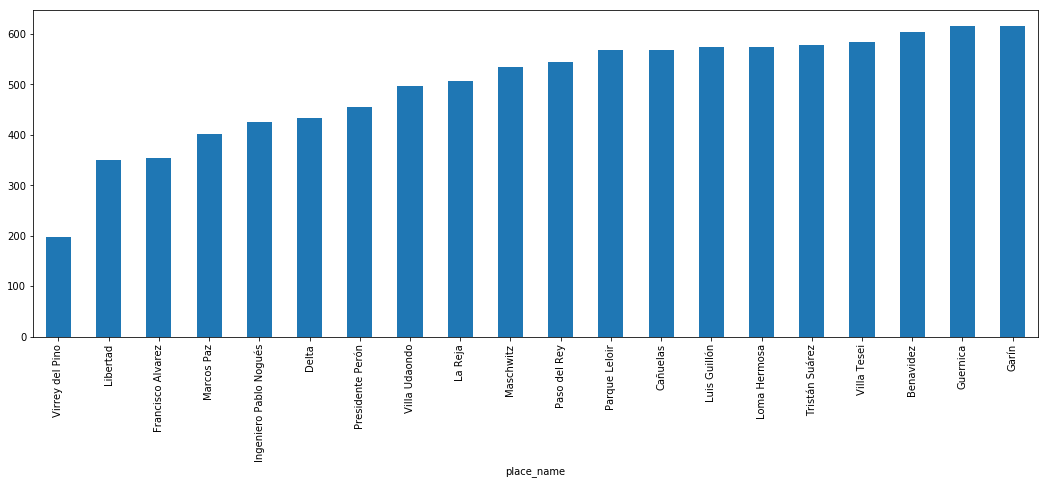

In [29]:
grouped = data.loc[(data.place_name!=None ) & ( ~data.place_name.str.contains('Zona',na=False) ) & (data.price_usd_per_m2!=None)]
grouped = grouped.groupby('place_name').agg([np.size, np.mean])
# por lo menos 50 ventas
grouped.loc[grouped[('price_usd_per_m2', 'size')] > 50, : ][('price_usd_per_m2','mean')].sort_values(ascending=True)[0:20].plot(kind='bar',figsize=(18,6));

In [5]:
#De cuántos ambientes son las casas ofrecidas en Gran Buenos Aires
gba= data.loc[(data.property_type == 'house') & (data.rooms<13) & (data.state_name.str.contains('G.B.A')),\
             ['created_on','price_usd_per_m2','place_name','rooms']]
gba.created_on = pd.to_datetime(gba.created_on, format='%Y/%m/%d')
gba.rooms.value_counts()

4.0     8428
3.0     6883
5.0     5131
6.0     1868
2.0     1405
7.0      811
1.0      275
8.0      274
9.0       95
10.0      91
11.0      18
12.0      12
Name: rooms, dtype: int64

In [6]:
gba = gba.loc[gba.rooms==4,:] #me quedo con la cantidad mas significativa
gba.place_name.value_counts()
gba = gba.loc[:,['price_usd_per_m2','created_on','place_name']].dropna()
gba.place_name.value_counts()

Ramos Mejía                          556
Haedo                                321
Ituzaingó                            243
Tigre                                192
Villa Luzuriaga                      115
Caseros                              110
Olivos                               106
San Justo                            101
Escobar                              101
Villa Ballester                       86
Pilar                                 83
Nordelta                              81
Villa Sarmiento                       74
General San Martín                    72
El Palomar                            68
Castelar                              65
Benavidez                             64
La Plata                              60
Morón                                 57
Maschwitz                             53
Presidente Perón                      50
Lomas del Mirador                     48
San Miguel                            43
Canning                               39
San Isidro      

In [7]:
selected_places_gba = gba.loc[(gba.place_name == 'Ramos Mejía') | \
                                        (gba.place_name == 'Haedo' ) | \
                                        (gba.place_name == 'Ituzaingó') | \
                                        (gba.place_name== 'Tigre') | \
                                        (gba.place_name== 'Pilar') | \
                                        (gba.place_name== 'Escobar'),\
                                        ['place_name','price_usd_per_m2','created_on']].\
                                        pivot_table(index='created_on',columns='place_name')
selected_places_gba

price_usd_per_m2                                         \
place_name          Escobar        Haedo    Ituzaingó        Pilar   
created_on                                                           
2013-05-24              NaN          NaN          NaN  1063.842871   
2013-07-22              NaN          NaN          NaN          NaN   
2014-01-13              NaN          NaN          NaN          NaN   
2014-03-29              NaN          NaN   340.909091          NaN   
2014-04-29              NaN          NaN   309.090909          NaN   
2014-05-27      2750.000000          NaN          NaN          NaN   
2014-07-07              NaN          NaN   253.333333          NaN   
2014-07-08              NaN          NaN  1105.769231          NaN   
2014-08-14      3250.000000          NaN          NaN          NaN   
2014-09-20              NaN          NaN          NaN          NaN   
2014-10-11              NaN          NaN   187.500000          NaN   
2014-11-14              NaN   990.779186          NaN          NaN   
2014-11-21              NaN          NaN          NaN          NaN   
2014-11-28              NaN          NaN          NaN          NaN   
2014-12-02              NaN          NaN          NaN          NaN   
2014-12-11              NaN          NaN   314.009662          NaN   
2015-01-08              NaN          NaN   350.526316          NaN   
2015-01-11              NaN  1066.666667          NaN          NaN   
2015-01-17              NaN          NaN   333.333333          NaN   
2015-01-30       378.947368          NaN          NaN          NaN   
2015-02-13              NaN          NaN          NaN          NaN   
2015-02-18              NaN          NaN          NaN          NaN   
2015-02-27              NaN  1166.666667          NaN          NaN   
2015-03-01              NaN          NaN          NaN          NaN   
2015-03-14              NaN          NaN          NaN          NaN   
2015-03-16              NaN          NaN          NaN          NaN   
2015-03-18              NaN  1198.076923          NaN          NaN   
2015-03-24              NaN          NaN   460.000000          NaN   
2015-04-08              NaN  1060.606061          NaN          NaN   
2015-04-16              NaN          NaN          NaN          NaN   
...                     ...          ...          ...          ...   
2017-04-18              NaN  1116.071429          NaN          NaN   
2017-04-21       316.062176  1363.636364   363.636364          NaN   
2017-04-22              NaN          NaN          NaN          NaN   
2017-04-25              NaN  1923.076923          NaN          NaN   
2017-04-28              NaN          NaN   495.847424   314.285714   
2017-05-04              NaN  1318.181818          NaN          NaN   
2017-05-05              NaN          NaN   875.000000          NaN   
2017-05-10              NaN          NaN   349.584550          NaN   
2017-05-15              NaN  1333.333333          NaN          NaN   
2017-05-23              NaN          NaN          NaN          NaN   
2017-05-24              NaN  1200.000000          NaN          NaN   
2017-05-27              NaN          NaN          NaN   405.405405   
2017-05-30              NaN  1740.350877   775.000000          NaN   
2017-05-31              NaN   783.333333          NaN          NaN   
2017-06-05              NaN          NaN   633.333333          NaN   
2017-06-09              NaN  1143.827593          NaN          NaN   
2017-06-10              NaN          NaN          NaN   445.000000   
2017-06-17              NaN   855.546622          NaN          NaN   
2017-06-20              NaN   451.649233          NaN          NaN   
2017-06-22              NaN  1011.914894          NaN          NaN   
2017-06-26              NaN   753.524620          NaN          NaN   
2017-07-04              NaN          NaN   878.917910          NaN   
2017-07-10              NaN   482.379438          NaN          NaN   
2017-07-11           

In [10]:
selected_places_gba.columns = selected_places_gba.columns.droplevel()
meds = selected_places_gba.median()
selected_places_gba = selected_places_gba[meds.index]

In [11]:
meds.sort_values(ascending=False)

place_name
Ramos Mejía    1293.309438
Haedo          1043.460925
Pilar          1029.411765
Escobar         900.000000
Tigre           861.320133
Ituzaingó       673.538961
dtype: float64

In [12]:
Media_price = gba.loc[(gba.place_name == 'Ramos Mejía') | \
                                        (gba.place_name == 'Haedo' ) | \
                                        (gba.place_name == 'Ituzaingó') | \
                                        (gba.place_name== 'Tigre') | \
                                        (gba.place_name== 'Pilar') | \
                                        (gba.place_name== 'Escobar'),
                                        ['price_usd_per_m2']].mean()
Media_price

price_usd_per_m2    1162.025162
dtype: float64

# Cuánto varía el precio en usd por m2 de las casas en G.B.A ?

[None]

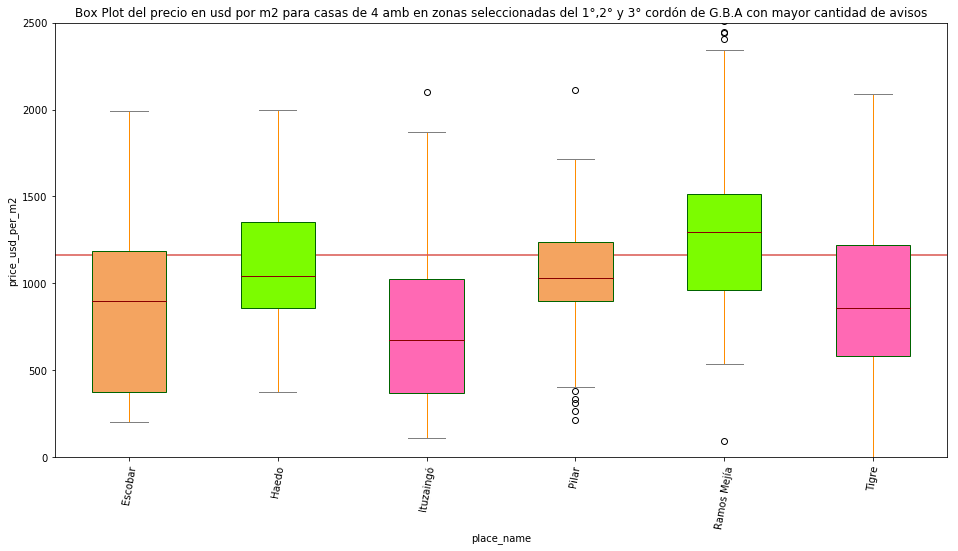

In [27]:
props = dict(boxes="DarkGreen", whiskers="DarkOrange", medians="DarkRed", caps="Gray")
boxplot=selected_places_gba.plot.box(return_type='dict', figsize=(16,8),rot=80,title='Box Plot del precio en usd por m2 para casas de 4 amb en zonas seleccionadas del 1°,2° y 3° cordón de G.B.A con mayor cantidad de avisos',color=props, patch_artist=True);

ax=plt.gca()
ax.set_ylim([0,2500]);
ax.set_ylabel('price_usd_per_m2');
ax.set_xlabel('place_name');
plt.axhline(Media_price.price_usd_per_m2,color=sns.xkcd_rgb["pale red"])

boxplot['boxes'][0].set( facecolor = 'sandybrown' )
boxplot['boxes'][3].set( facecolor = 'sandybrown' )
boxplot['boxes'][1].set( facecolor = 'lawngreen' )
boxplot['boxes'][4].set( facecolor = 'lawngreen' )
boxplot['boxes'][2].set( facecolor = 'hotpink' )
boxplot['boxes'][5].set( facecolor = 'hotpink' )


In [39]:
#De cuántos ambientes son las casas ofrecidas en Capital Federal
caba= data.loc[(data.property_type == 'house') & (data.rooms<13) & (data.state_name.str.contains('Capital')),\
             ['created_on','price_usd_per_m2','place_name','rooms']]
caba.created_on = pd.to_datetime(caba.created_on, format='%Y/%m/%d')
caba.rooms.value_counts()

5.0     661
4.0     569
6.0     319
3.0     213
7.0     156
1.0      65
2.0      51
8.0      38
10.0     18
9.0      18
11.0     15
12.0      7
Name: rooms, dtype: int64

In [40]:
caba = caba.loc[caba.rooms==4,['created_on','place_name','price_usd_per_m2']].dropna()
caba.place_name.value_counts()

Mataderos              27
Villa Devoto           21
Barracas               17
Liniers                15
Caballito              14
Saavedra               14
Belgrano               11
Floresta               11
Villa Urquiza          10
Villa Lugano           10
Colegiales             10
Villa del Parque        9
Palermo                 9
Flores                  8
Nuñez                   8
Villa Pueyrredón        7
Almagro                 6
Chacarita               5
Capital Federal         5
Boedo                   5
Versalles               5
Parque Chacabuco        4
Pompeya                 3
Paternal                3
San Nicolás             3
Villa Ortuzar           3
Parque Patricios        3
Villa Luro              3
Monte Castro            2
Villa Crespo            2
Coghlan                 2
Boca                    2
Villa Real              1
Barrio Norte            1
Palermo Hollywood       1
Abasto                  1
Recoleta                1
Velez Sarsfield         1
Villa Genera

In [41]:
selected_places_caba = caba.loc[(caba.place_name == 'Villa Devoto') | \
                                        (caba.place_name == 'Mataderos') | \
                                        (caba.place_name== 'Barracas') | \
                                        (caba.place_name== 'Liniers') | \
                                        (caba.place_name== 'Caballito'),\
                                        ['place_name','price_usd_per_m2','created_on']].\
                                        pivot_table(index='created_on',columns='place_name')
selected_places_caba

price_usd_per_m2                                         \
place_name         Barracas    Caballito      Liniers    Mataderos   
created_on                                                           
2013-05-05       921.052632          NaN          NaN          NaN   
2013-07-19              NaN          NaN          NaN  1327.160494   
2015-09-22              NaN          NaN          NaN   932.642487   
2015-09-24              NaN          NaN  1084.033613          NaN   
2015-11-07              NaN          NaN          NaN          NaN   
2015-11-16              NaN          NaN          NaN          NaN   
2015-12-22       820.512821          NaN          NaN          NaN   
2016-03-15              NaN          NaN  1000.000000  1117.251462   
2016-03-16       983.050847          NaN          NaN          NaN   
2016-03-21              NaN          NaN          NaN          NaN   
2016-03-23              NaN          NaN          NaN          NaN   
2016-04-04      1000.000000          NaN          NaN          NaN   
2016-04-23              NaN          NaN          NaN          NaN   
2016-04-26       968.992248          NaN          NaN          NaN   
2016-04-27              NaN          NaN          NaN   813.953488   
2016-04-30              NaN          NaN  1125.000000          NaN   
2016-05-06              NaN          NaN          NaN  1666.666667   
2016-06-09      1791.443850          NaN          NaN          NaN   
2016-06-24       800.000000          NaN          NaN          NaN   
2016-07-01              NaN          NaN          NaN  1734.693878   
2016-07-14              NaN          NaN  1586.538462          NaN   
2016-07-20              NaN  1833.333333          NaN   982.954545   
2016-07-26              NaN          NaN          NaN  1138.562092   
2016-08-04              NaN          NaN          NaN          NaN   
2016-08-06              NaN          NaN          NaN          NaN   
2016-08-09       671.428571          NaN          NaN          NaN   
2016-08-23       890.688259          NaN          NaN          NaN   
2016-08-25              NaN          NaN          NaN  1296.875000   
2016-08-29              NaN          NaN          NaN          NaN   
2016-08-30              NaN          NaN          NaN          NaN   
2016-09-01              NaN          NaN   727.272727          NaN   
2016-10-08              NaN          NaN          NaN          NaN   
2016-10-17              NaN          NaN          NaN  1090.730859   
2016-12-04              NaN          NaN  1637.426901          NaN   
2016-12-07              NaN  1410.526316          NaN          NaN   
2016-12-13      1117.318436          NaN          NaN          NaN   
2016-12-20              NaN          NaN          NaN  1531.914894   
2017-01-03              NaN          NaN  1069.518717          NaN   
2017-01-04              NaN  1361.111111          NaN          NaN   
2017-02-04              NaN  2272.727273          NaN          NaN   
2017-02-12              NaN          NaN          NaN   900.000000   
2017-02-16      1007.194245          NaN   827.083333          NaN   
2017-02-20              NaN          NaN          NaN          NaN   
2017-03-16              NaN          NaN          NaN          NaN   
2017-03-19              NaN   288.888889          NaN          NaN   
2017-03-28              NaN  2204.724409          NaN   842.105263   
2017-04-05              NaN  2182.389937  1543.750000          NaN   
2017-04-09              NaN          NaN  1441.176471          NaN   
2017-04-13              NaN  2000.000000          NaN          NaN   
2017-04-28              NaN  1392.857143          NaN   796.482249   
2017-05-02              NaN          NaN          NaN          NaN   
2017-05-10              NaN          NaN          NaN  1702.127660   
2017-05-24              NaN          NaN          NaN          NaN   
2017-06-07              NaN          NaN  1277.777778          NaN   
2017-06-28      1450.

In [42]:
selected_places_caba.columns = selected_places_caba.columns.droplevel()
meds = selected_places_caba.median()
selected_places_caba = selected_places_caba[meds.index]

In [32]:
meds.sort_values(ascending=False)

place_name
Villa Devoto    1800.000000
Caballito       1750.760269
Liniers         1104.516807
Mataderos       1036.842702
Barracas         976.021548
dtype: float64

In [33]:
Media_price = caba.loc[(caba.place_name == 'Barracas') | \
                                        (caba.place_name == 'Villa Devoto') | \
                                        (caba.place_name== 'Caballito') | \
                                        (caba.place_name== 'Mataderos') | \
                                        (caba.place_name== 'Liniers'),
                                        ['price_usd_per_m2']].mean()
Media_price

price_usd_per_m2    1335.710025
dtype: float64

# Cuánto varía el precio en usd por m2 de las casas en CABA ?

[None]

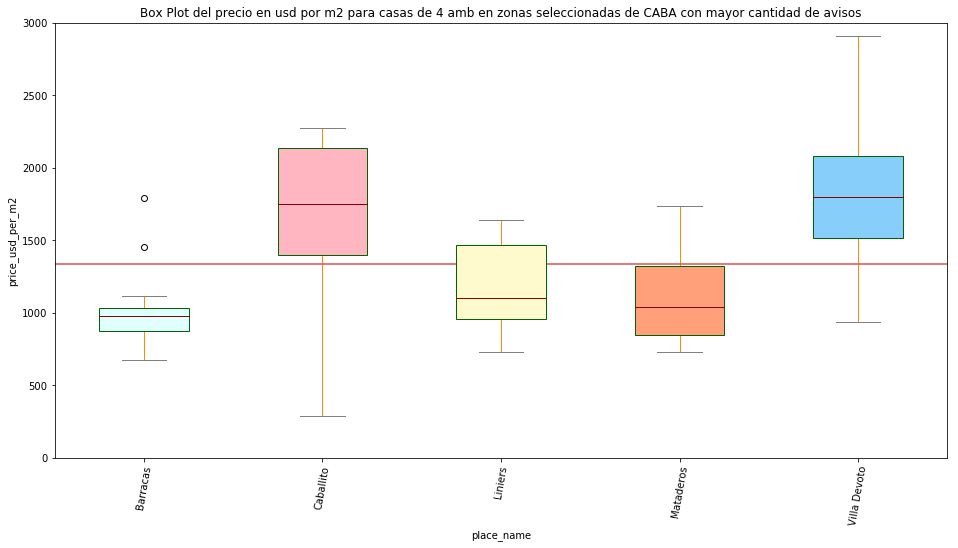

In [35]:
props = dict(boxes="DarkGreen", whiskers="DarkOrange", medians="DarkRed", caps="Gray")
boxplot=selected_places_caba.plot.box(return_type='dict', figsize=(16,8),rot=80,title='Box Plot del precio en usd por m2 para casas de 4 amb en zonas seleccionadas de CABA con mayor cantidad de avisos',color=props, patch_artist=True);

ax=plt.gca()
ax.set_ylim([0,3000]);
ax.set_ylabel('price_usd_per_m2');
ax.set_xlabel('place_name');
plt.axhline(Media_price.price_usd_per_m2,color=sns.xkcd_rgb["pale red"])

boxplot['boxes'][0].set( facecolor = 'lightcyan' )
boxplot['boxes'][3].set( facecolor = 'lightsalmon' )
boxplot['boxes'][1].set( facecolor = 'lightpink' )
boxplot['boxes'][4].set( facecolor = 'lightskyblue' )
boxplot['boxes'][2].set( facecolor = 'lemonchiffon' )


# Relación entre número de ambientes y valor de expensas

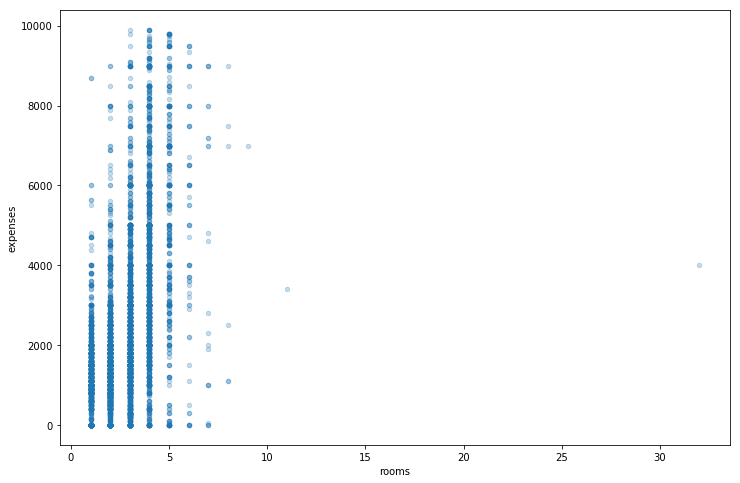

In [12]:

floor_vs_exp = data.loc[data.state_name=='Capital Federal',['expenses','rooms']].dropna()
floor_vs_exp.expenses = floor_vs_exp.expenses.astype(int)
floor_vs_exp = floor_vs_exp.loc[(floor_vs_exp.expenses<10000)]
floor_vs_exp.plot.scatter('rooms','expenses',alpha=0.25,figsize=(12,8));